Letting sensor settle
Ready to take measurement
Interrupt!


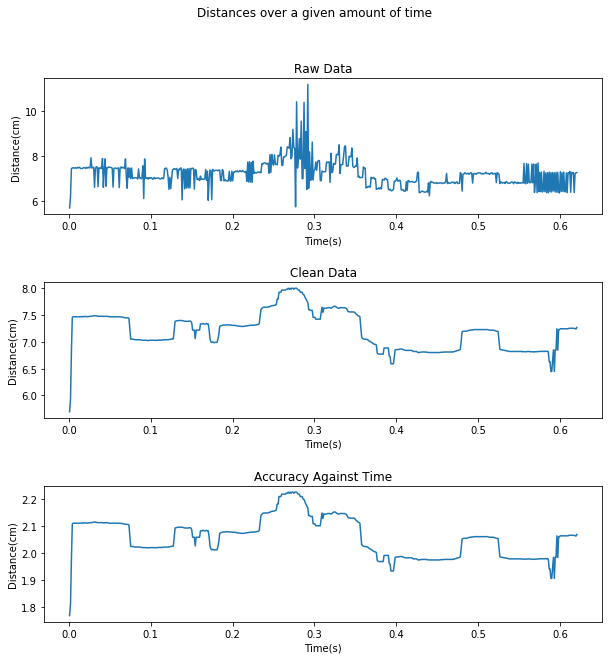

In [5]:
import RPi.GPIO as GPIO #Import all required libraries
import time
import numpy as np
import matplotlib.pyplot as plt

GPIO.setmode(GPIO.BCM) #Set board numbering

trigPin = 19   #Define all pin numbers
echoPin = 18
buttonPin = 27

distances = np.array([])  #Create array for distances
times = np.array([])      #Create array for times  

GPIO.setup(buttonPin, GPIO.IN, pull_up_down = GPIO.PUD_DOWN) #Set up button with pull down resistor
GPIO.setup(trigPin, GPIO.OUT)  #Set up the 'trigger' pin for the ultrasonic sensor
GPIO.setup(echoPin, GPIO.IN)   #Set up the 'reciever' pin for the ultrasonic sensor

def cleanData(x):   #Define function to clean data
    a = np.copy(x) #create copy of entered array
    c = np.zeros(a.size, dtype='float') #Create array to input data to
    m = int(0.035 * x.size) #Sets max window as a percentage of the array size

    c[0] = x[0] #Set first element
    for i in range(1, a.size): #Go through the array
        w = min(m,i,a.size-i) #Set the window size with boundary conditions in mind
        c[i] = np.median(a[i-w:i+w]) #Create median value of each set of data based on the window given
    c[a.size-1] = a[a.size-1] #Set final element
    #LOOK AT MAKING THE WINDOW A PERCENTAGE OF THE SIZE OF THE ARRAY GIVEN
    return c #return clean data

def accuracy(x):
    u = np.array([])
    for i in x:
        u = np.append(u, pow(math.e, 0.1*i))
    return u


GPIO.output(trigPin, False)  #Start the sensor in the off position
print('Letting sensor settle') #Inform user that the sensor is setting itself up
time.sleep(2) #Give sensor time to calibrate
print('Ready to take measurement') #Tell users when the sensor is ready




try:  #Begin looping
    while True:
        if GPIO.input(buttonPin) == 1: #look for button push
            t0 = time.time() #Initialize timing variables
            t = t0
            while GPIO.input(buttonPin) == 1:
                GPIO.output(trigPin, True)  #Trigger sensor
                time.sleep(0.00001)  #Pulse for 10 microseconds
                GPIO.output(trigPin, False) #End ultrasonic pulse
                while GPIO.input(echoPin) == 0: #Start timer for pulse
                    tstart = time.time()

                while GPIO.input(echoPin) == 1: #End timer for pulse when it is recieved the the sensor returns '1'
                    tend = time.time()

                t = time.time() #Create difference in time
                timingDiff = t - t0 #Find the time it took from the start to take the measurement
                diff = (tend - tstart) #Find the time it took to emit and recieve ultrasonic pulse
                distance = diff*17150 #Calculate the distance with 1/2 the speed of sound in cm/s
                distance = round(distance, 2) #Round the distance
                distances = np.append(distances, distance) #Add distance to array
                times = np.append(times, timingDiff) #Add time of the recording to time array
                
        
except(KeyboardInterrupt, SystemExit):
    print("Interrupt!")
finally:
    fig, axs = plt.subplots(3, 1, figsize = (10,10))
    plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = None, hspace = 0.5)

    axs[0].plot(times, distances)
    axs[0].set_title('Raw Data')
    axs[0].set_xlabel('Time(s)')
    axs[0].set_ylabel('Distance(cm)')
    fig.suptitle('Distances over a given amount of time')

    axs[1].plot(times, cleanData(distances))
    axs[1].set_title('Clean Data')
    axs[1].set_xlabel('Time(s)')
    axs[1].set_ylabel('Distance(cm)')
    
    axs[2].plot(times, accuracy(cleanData(distances)))
    axs[2].set_title('Accuracy Against Time')
    axs[2].set_xlabel('Time(s)')
    axs[2].set_ylabel('Distance(cm)')
    
    GPIO.cleanup()

In [ ]:
    fig, axs = plt.subplots(3, 1, figsize = (10,10))
    plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = None, hspace = 0.75)

    axs[0].plot(times, distances)
    axs[0].set_title('Raw Data')
    axs[0].set_xlabel('Time(s)')
    axs[0].set_ylabel('Distance(cm)')
    fig.suptitle('Distances over a given amount of time')

    axs[1].plot(times, cleanData(distances))
    axs[1].set_title('Clean Data')
    axs[1].set_xlabel('Time(s)')
    axs[1].set_ylabel('Distance(cm)')
    
    axs[2].plot(times, exponential(cleanData(distances)))
    axs[2].set_title('Clean Data')
    axs[2].set_xlabel('Time(s)')
    axs[2].set_ylabel('Distance(cm)')

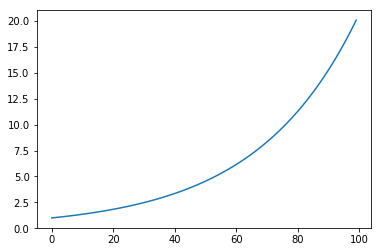

In [2]:
import math
n = np.linspace(0,10, 100)
def exponential(p):
    u = np.array([])
    for i in p:
        u = np.append(u, pow(math.e, 0.3*i))
    return u

plt.plot(exponential(n))